# 1.0 EDA - Exploratory Data Analysis

The  process of organizing, plotting and summarizing a data set

# 2.0 Dependencies

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

# 3.0 Defining default figuresize parameters

In [13]:
plt.rcParams['figure.figsize'] = [10, 5]

# 4.0 Load the data

In [14]:
from sklearn.datasets import load_iris

Check out victor Tong's answer from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

In [15]:
#converting the data into a dataframe
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

#adding categorical data
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

#creating versicolor dataframe
#here we use a boolean variable to filter the whole dataframe
versicolor=df[df['species']=='versicolor']
#and then slice the dataframe for the petal length
versicolor_petal_length=versicolor['petal length (cm)']

# 5.0 Plotting the data as a histogram

In [16]:
#set the plotting style
sns.set()

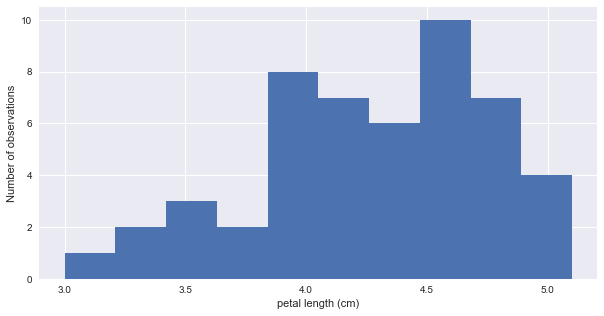

In [17]:
#create plot
plt.hist(versicolor_petal_length)

#details the plot
plt.xlabel('petal length (cm)')
plt.ylabel('Number of observations')

plt.show()

## 5.1 Changing the number of bins

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples

In [18]:
#calculate the number of samples
n_data=len(versicolor_petal_length)

#square root of the number of samples n
sqrt=np.sqrt(n_data)

#convert to an integer to make
nbins=int(sqrt)
nbins

7

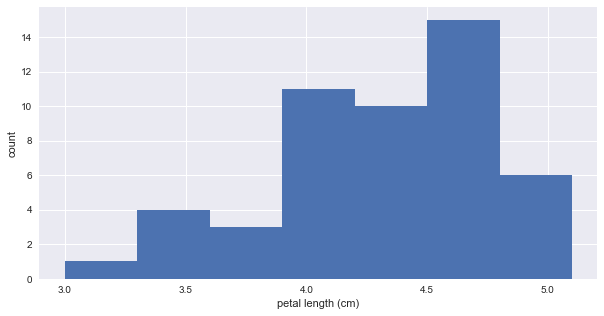

In [19]:
# Plot the histogram
plt.clf()
plt.hist(versicolor_petal_length, bins=nbins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

Note: The x axis hasnt actually changed but the resolution of the plot has increased to the number of bins

# 5.2 Binning Bias --> swarmplots

Depending on how you bin your data, the interpretation can led to different outcomes  Basically we are aggregating the data in an nonstandardised way which leads to details being lost

Swarm plotting the data to remove the binning bias

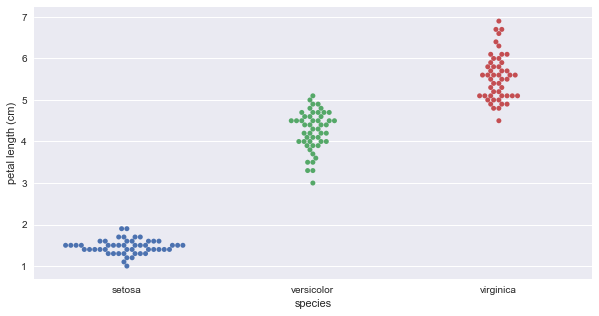

In [20]:
sns.swarmplot(x='species',y='petal length (cm)',data=df)
plt.show()

# 6.0 ECDF - Empirical cumulative distribution functions

Sometime we can not use the beeswarm plot if the number of observations is too high. In this case the 'column' width of each category is fixed and we would end up obfuscating the data (counter to the whole point of the swarm plot)  
  
In this case this is where we use the ECDF

workflow:
* import numpy
* sort the data you wish to plot
* generate an evenly spaced y axis https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html
* plot points without a line between the points
* label the axes
* define margins to make sure data doesnt run off the plot

Let's create an ECDF function

In [21]:
def ecdf(data):
    """Generates an empirical cummulative distribution function for data"""
    
    # Calculate the number of observations
    n=len(data)
    
    # Calculate the x data
    x=np.sort(data)
    
    # Calculate an evenly distributed y axis and divide by the length to make it a percentage
    # n+1 because the end value is not inclusive
    # Note: its 'np.arange' and not np.arrange()
    y=np.arange(1,n+1)/n
    
    return x,y

The above function returns two values, so we will need to 'unpack' them into different variables

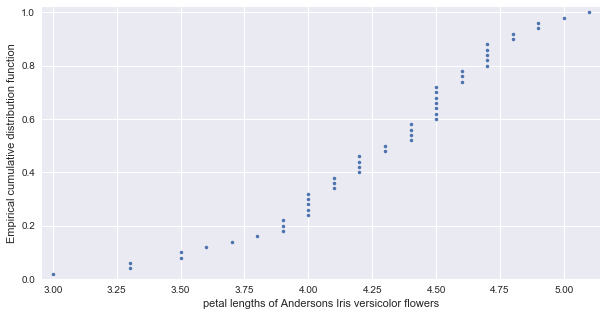

In [22]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal lengths of Andersons Iris versicolor flowers')
plt.ylabel('Empirical cumulative distribution function')

# Display the plot
plt.margins(0.02)
plt.show()

## 6.1 Comparing distributions

### 6.1.1 Creating the series

In [23]:
df['species'].unique()

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

Refer to ak3191's answer in this post https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop/30638956

In [24]:
setosa=df[df['species']=='setosa']
#and then slice the dataframe for the petal length
setosa_petal_length=setosa['petal length (cm)']
setosa_petal_length.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal length (cm), dtype: float64

In [25]:
virginica=df[df['species']=='virginica']
#and then slice the dataframe for the petal length
virginica_petal_length=virginica['petal length (cm)']

### 6.1.2 Create ECDFs

In [26]:
# Compute ECDFs
x_set, y_set=ecdf(setosa_petal_length)
x_vers, y_vers=ecdf(versicolor_petal_length)
x_virg, y_virg=ecdf(virginica_petal_length)

In [27]:
# Plot all ECDFs on the same plot
_=plt.plot(x_set, y_set,marker='.',linestyle='none')
_=plt.plot(x_vers, y_vers,marker='.',linestyle='none')
_=plt.plot(x_virg, y_virg,marker='.',linestyle='none')

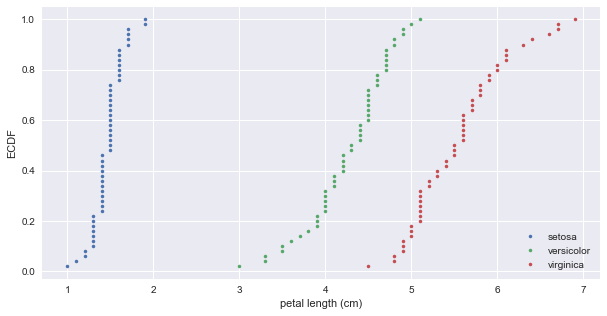

In [28]:
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()